<a href="https://www.kaggle.com/code/mrafraim/dl-day-12-full-forward-backpropagation?scriptVersionId=287408346" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Day 12: Full Forward + Backpropagation Example

Welcome to Day 12!

Today you will:
- Combine forward pass and backpropagation
- Build a mini training loop
- Train a tiny neural network for multiple epochs
- Observe loss reduction over time

This is the skeleton of every deep learning framework.

---

# Network Architecture

$$
Input (2) → Hidden (2, ReLU) → Output (1, Sigmoid)
$$

Equations:

Hidden layer:
$$
Z^{(1)} = W^{(1)} X + b^{(1)}, \quad A^{(1)} = ReLU(Z^{(1)})
$$

Output layer:
$$
Z^{(2)} = W^{(2)} A^{(1)} + b^{(2)}, \quad A^{(2)} = \sigma(Z^{(2)})
$$

Loss:
$$
L = (y - A^{(2)})^2
$$


In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# One training sample
X = np.array([[1.0],
              [2.0]])

y = np.array([[1.0]])

In [3]:
# Parameter initialization
np.random.seed(42)

W1 = np.random.randn(2, 2) * 0.5
b1 = np.zeros((2, 1))

W2 = np.random.randn(1, 2) * 0.5
b2 = np.zeros((1, 1))

W1, b1, W2, b2

(array([[ 0.24835708, -0.06913215],
        [ 0.32384427,  0.76151493]]),
 array([[0.],
        [0.]]),
 array([[-0.11707669, -0.11706848]]),
 array([[0.]]))

In [4]:
# Activation functions
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [5]:
# Forward propagation function
def forward(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    return Z1, A1, Z2, A2


In [6]:
# Loss function
def mse_loss(y, y_hat):
    return (y_hat - y)**2


# Backpropagation Logic

We compute:
- Output gradients
- Hidden layer gradients
- Weight & bias gradients

All via chain rule.


In [7]:
# Backpropagation function
def backward(X, y, Z1, A1, Z2, A2, W2):
   
    # Output layer
    dL_dA2 = 2 * (A2 - y)
    dA2_dZ2 = A2 * (1 - A2)
    dZ2 = dL_dA2 * dA2_dZ2

    dW2 = np.dot(dZ2, A1.T)
    db2 = dZ2

    # Hidden layer
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)

    dW1 = np.dot(dZ1, X.T)
    db1 = dZ1

    return dW1, db1, dW2, db2


# Training Loop

Each epoch(how many times the model has seen the entire dataset):
1. Forward pass
2. Compute loss
3. Backpropagation
4. Update parameters


In [8]:
# Training  loop
lr = 0.1
epochs = 50

loss_history = []

for epoch in range(epochs):
    # Forward
    Z1, A1, Z2, A2 = forward(X, W1, b1, W2, b2)
    
    # Loss
    loss = mse_loss(y, A2)
    loss_history.append(loss.item())
    
    # Backward
    dW1, db1, dW2, db2 = backward(X, y, Z1, A1, Z2, A2, W2)
    
    # Update
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 0.3103
Epoch 10, Loss: 0.1043
Epoch 20, Loss: 0.0425
Epoch 30, Loss: 0.0221
Epoch 40, Loss: 0.0137


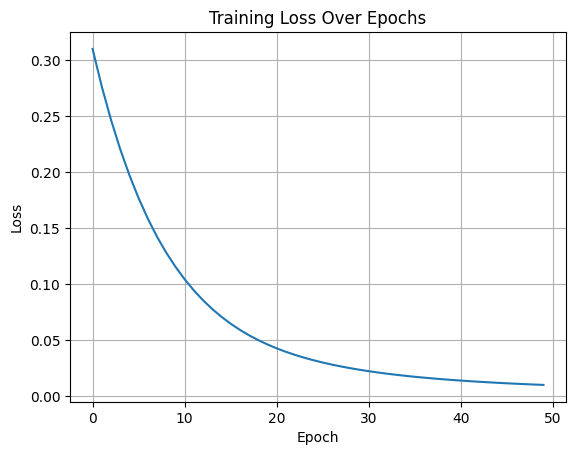

In [9]:
# Loss curve visualization
plt.figure()
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.grid(True)
plt.show()


- Loss monotonically decreasing → model is learning correctly.
- Early epochs: Large improvement (weights far from optimum)
- Later epochs: Loss decreases more slowly → approaching convergence
- Training is stable (no exploding or oscillating loss)

In [10]:
# Final prediction
_, _, _, final_prediction = forward(X, W1, b1, W2, b2)
final_prediction

array([[0.90271248]])

# What Just Happened?

- The network repeatedly adjusted weights
- Loss consistently decreased
- Prediction moved closer to target
- This is real learning, not a demo trick

Scaling this:
- More data
- More layers
- Better loss functions


# Key Takeaways from Day 12

- Forward + Backprop together form training
- Training = loop, not a single step
- NumPy training mirrors PyTorch/TensorFlow logic
- Loss curve is your first debugging tool
- Understanding this removes framework dependency

---

<p style="text-align:center; font-size:18px;">
© 2025 Mostafizur Rahman
</p>
